In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import random
import pandas as pd

import numpy as np
import glob
import os

import scipy.io as io
import copy
from PIL import Image
from PIL import ImageEnhance as IE

import preprocess_filter
import spoketools

In [8]:
selected_df = pd.read_csv("../src/jupyter_testing/pipeline_testing/selected_df.csv")

In [2]:
def opusid_to_rpjb_path(opus_id):
    rpjb_path = None

    temp_list = glob.glob(f"../data/2023_rpjb/good/*/{opus_id}*")
    if len(temp_list) == 1:
        rpjb_path = temp_list[0]
    elif len(temp_list) == 0:
        print("path doesn't exist")
    else:
        print("there were multiple!")

    return rpjb_path


In [11]:
new_path = "../data/2023_imagery/filtered/"
for opus_id in selected_df.opus_id:
    rpjb_path = opusid_to_rpjb_path(opus_id)
    folder = rpjb_path.split("/")[-2]
    folder_opus = f"{folder}/{opus_id}.png"

    filename,pixel_values =  preprocess_filter.apply_filters(rpjb_path)
    pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)
    pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)


    print(pixel_values.shape)
    print(new_path+folder_opus)
    
    preprocess_filter.save_image(new_path+folder_opus, pixel_values)
    
    
print("******************************************\ncomplete!")

(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630650351.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630647951.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630674351.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630640751.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630657551.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630632951.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630664751.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630656951.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630633551.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630665351.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630635951.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630641351.png
(160, 736)
../data/2023_imagery/filtered/117_SPKMVLFHP_005/W1630664151.png
(160, 736)
../data/2023_i

# Doing same for dark spokes

In [2]:
folder1 = glob.glob("../data/2023_rpjb/good/074_SPKLFMOV/*.rpjb")
print(len(folder1))
folder2 = glob.glob("../data/2023_rpjb/good/081_SPKMVLFLP/*.rpjb")
print(len(folder2))
folder3 = glob.glob("../data/2023_rpjb/good/085_SPKMVLFLP/*.rpjb")
print(len(folder3))
folder4 = glob.glob("../data/2023_rpjb/good/086_SPKMVLFLP/*.rpjb")
print(len(folder4))
folder5 = glob.glob("../data/2023_rpjb/good/088_SPKMVLFLP/*.rpjb")
print(len(folder5))
folder6 = glob.glob("../data/2023_rpjb/good/094_SPKMVLFLP/*.rpjb")
print(len(folder6))

17
40
34
35
47
49


In [3]:
all_dark_paths = folder1+folder2+folder3+folder4+folder5+folder6
len(all_dark_paths)

222

../data/2023_rpjb/good/074_SPKLFMOV/W1593682206_1_CALIB.rpjb


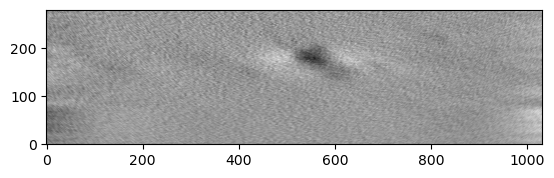

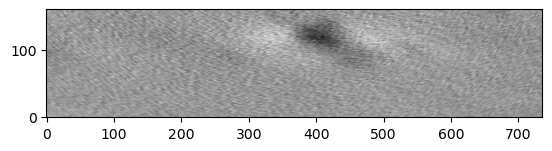

****************************************************************


In [4]:
new_path = "../data/2023_imagery/filtered/"

for rpjb_path in all_dark_paths[:10]:
    print(rpjb_path)
    folder = rpjb_path.split("/")[-2]
    opus_id = rpjb_path.split("/")[-1].split(".")[0]

    folder_opus = f"{folder}/{opus_id}.png"

    filename,pixel_values =  preprocess_filter.apply_filters(rpjb_path)
    pixel_values = spoketools.fft2lpf(pixel_values, 0, 3)
    plt.imshow(pixel_values, cmap = "gray", origin = "lower")
    plt.show()
    pixel_values = preprocess_filter.buffer_image(pixel_values, 736, 160)

    plt.imshow(pixel_values, cmap = "gray", origin = "lower")
    plt.show()
    # preprocess_filter.save_image(new_path+folder_opus, pixel_values)
    break


print("****************************************************************")